In [ ]:
import numpy as np
import pandas as pd # data processing,


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Csv  files/brain_tumor_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/10 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/11 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/1 no.jpeg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/N20.JPG
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/35 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/21 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/N2.JPG
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/12 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/27 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/N22.JPG
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/N1.JPG
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/39 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/28 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/20 no.jpg
/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/31 no.jpg
/cont

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
tf.__version__


'2.15.0'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(('/content/drive/MyDrive/Csv  files/brain_tumor_dataset'),
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


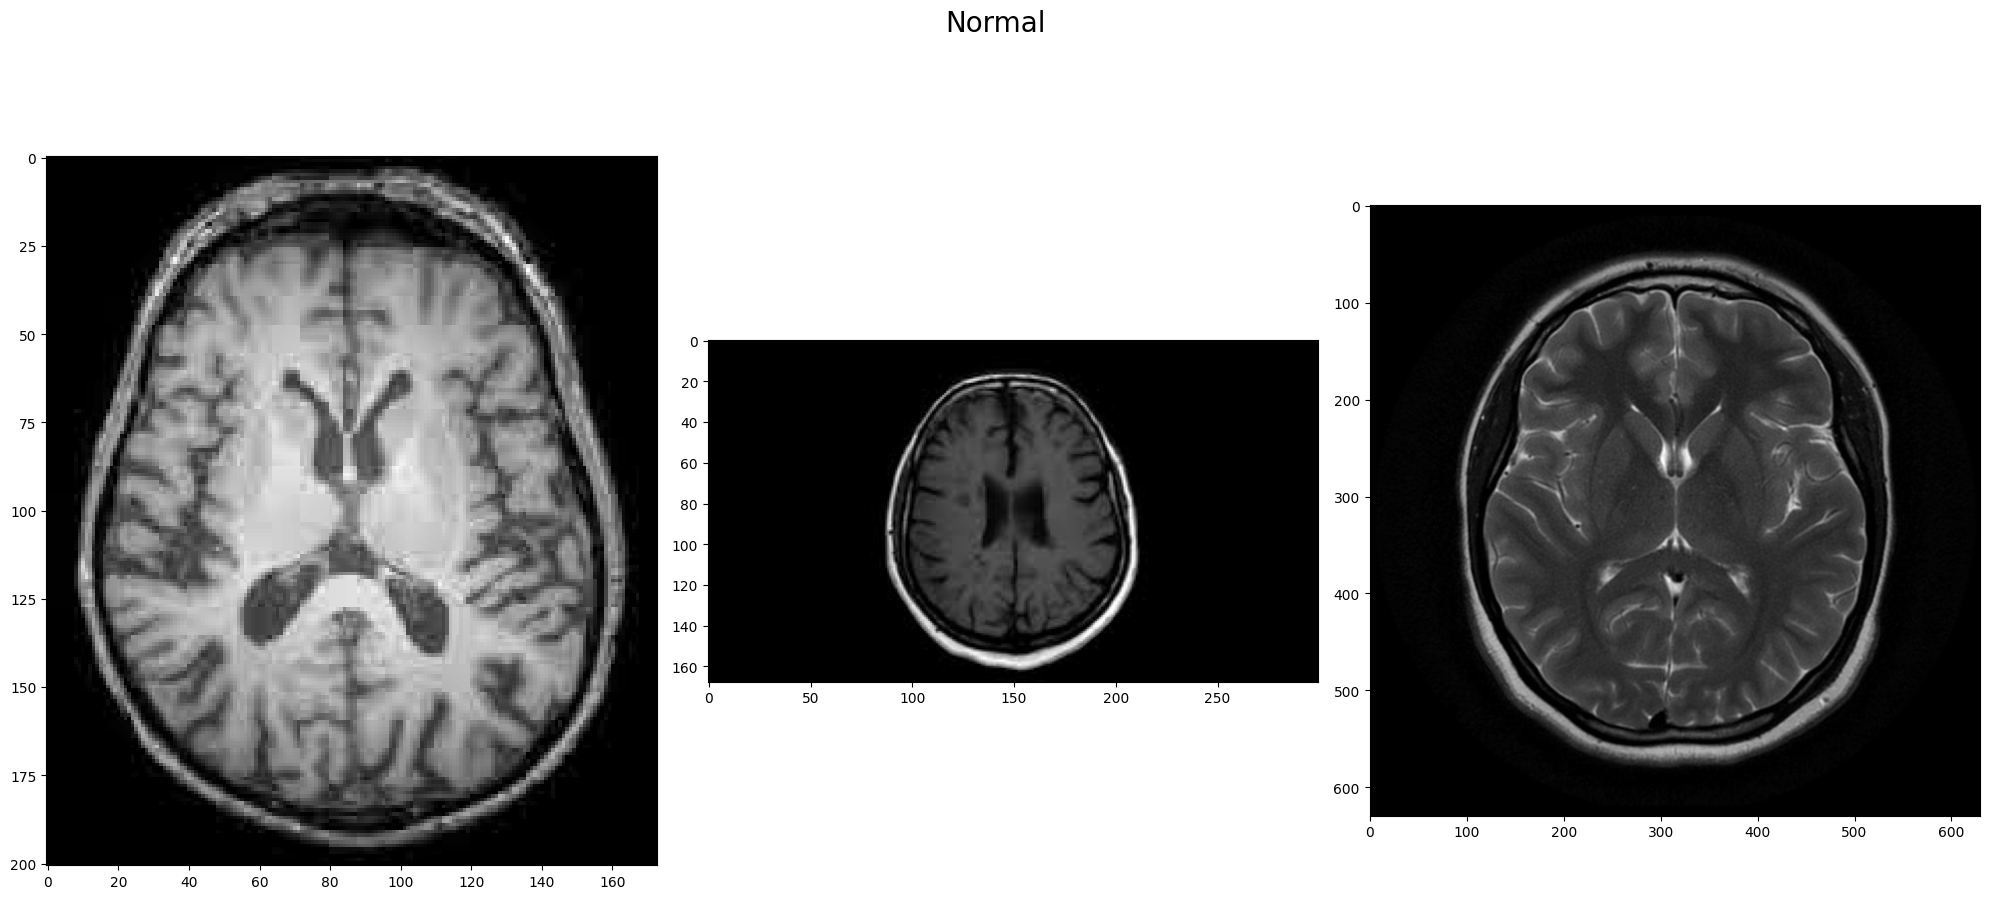

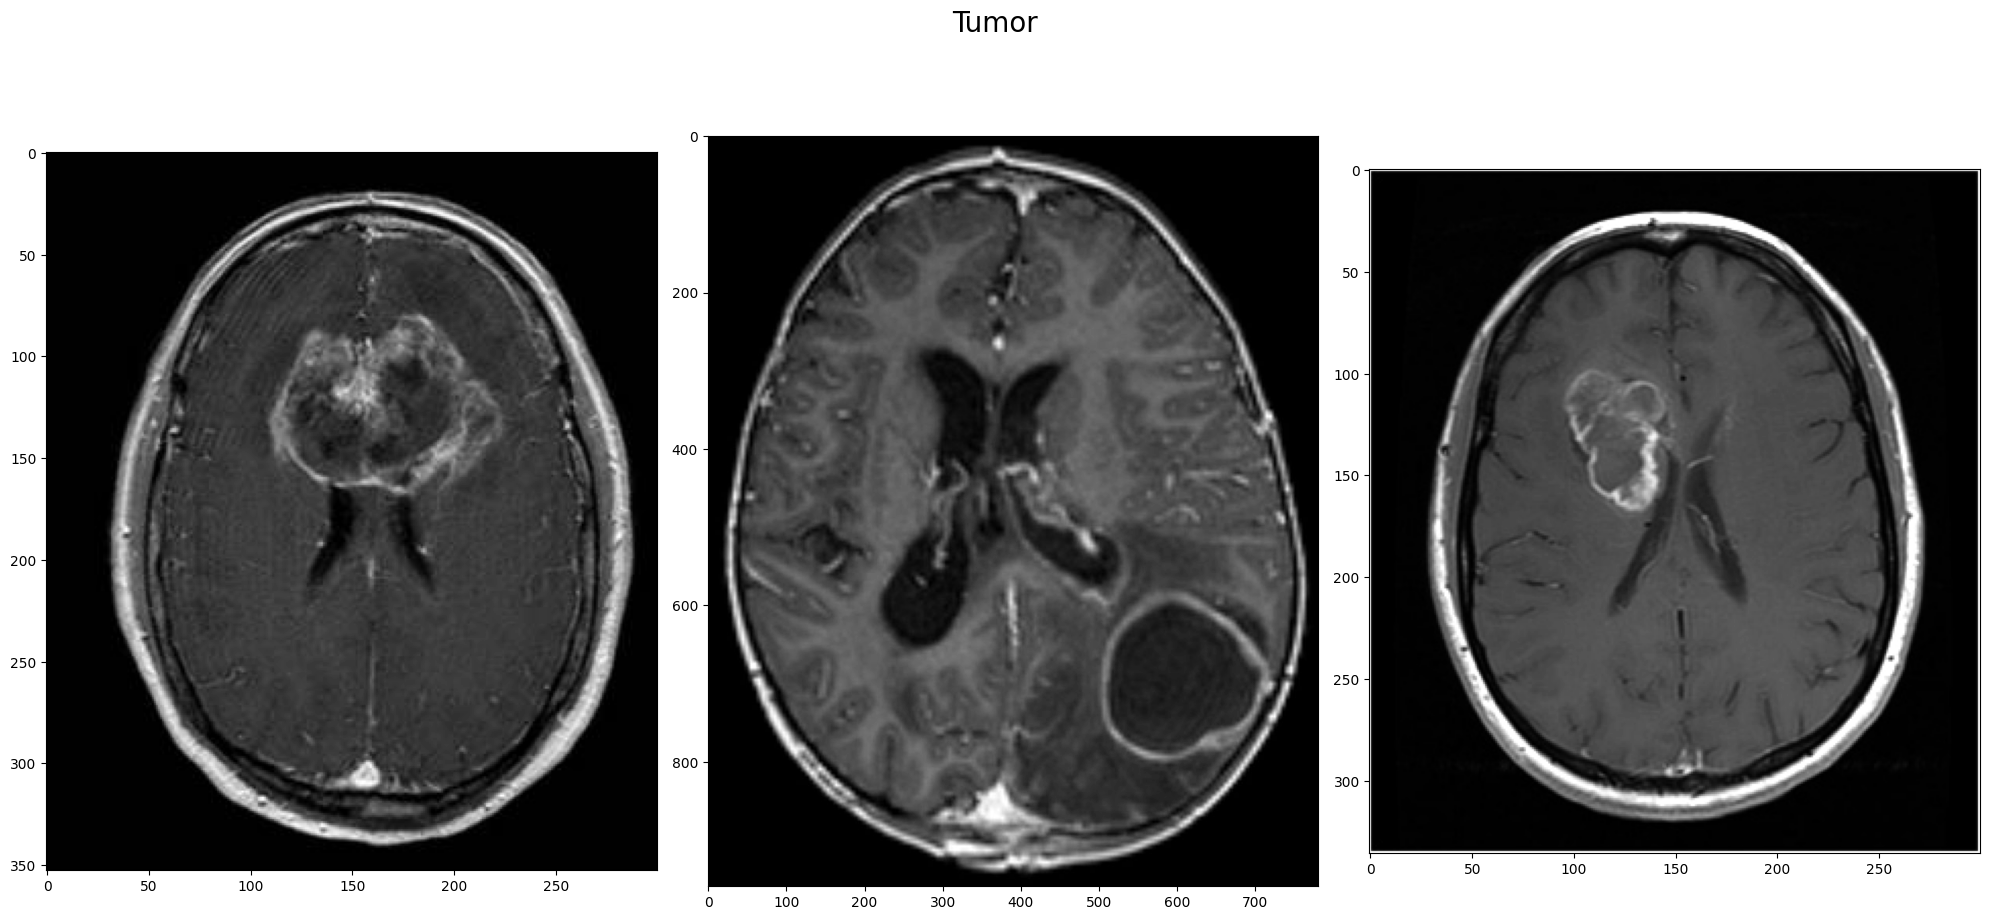

In [ ]:
import matplotlib.pyplot as plt
DATADIR = '/content/drive/MyDrive/Csv  files/brain_tumor_dataset'
CATEGORIES = {'no':'Normal', 'yes':'Tumor'}
x=0
for key, value in CATEGORIES.items():  # do dogs and cats
    path = os.path.join(DATADIR,key)  # create path to dogs and cats

    x=0
    fig, axes = plt.subplots(1,3, figsize=(20, 10))
    for img in os.listdir(path):  # iterate over each image per dogs and cats

        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        axes[x].imshow(img_array, cmap='gray')  # graph it
        x+=1

        if x==3 :
            break

    plt.suptitle(value, fontsize=20)
    plt.tight_layout()
    plt.show()

# Display image with size 200*200

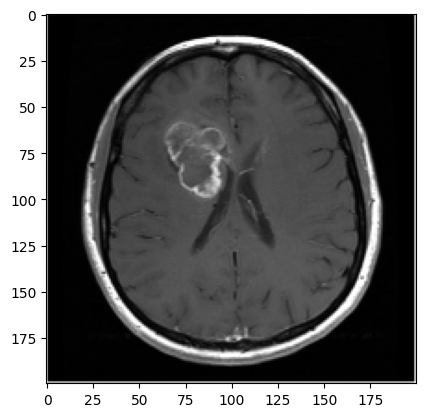

In [ ]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
len(training_set)

print(training_set.class_indices)

{'no': 0, 'yes': 1}


# Building the CNN

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the CNN on the Training set
cnn.fit(x = training_set, epochs = 10)


Epoch 1/25
8/8 [==============================] - 23s 3s/step - loss: 0.6967 - accuracy: 0.6719
Epoch 2/25
8/8 [==============================] - 2s 283ms/step - loss: 0.5978 - accuracy: 0.6877
Epoch 3/25
8/8 [==============================] - 3s 316ms/step - loss: 0.5740 - accuracy: 0.7391
Epoch 4/25
8/8 [==============================] - 3s 332ms/step - loss: 0.5481 - accuracy: 0.7075
Epoch 5/25
8/8 [==============================] - 4s 454ms/step - loss: 0.5399 - accuracy: 0.7194
Epoch 6/25
8/8 [==============================] - 3s 316ms/step - loss: 0.5187 - accuracy: 0.7589
Epoch 7/25
8/8 [==============================] - 3s 337ms/step - loss: 0.4871 - accuracy: 0.7549
Epoch 8/25
8/8 [==============================] - 3s 377ms/step - loss: 0.4564 - accuracy: 0.8103
Epoch 9/25
8/8 [==============================] - 3s 432ms/step - loss: 0.4213 - accuracy: 0.8142
Epoch 10/25
8/8 [==============================] - 2s 295ms/step - loss: 0.4315 - accuracy: 0.8261
Epoch 11/25
8/8 [====

# EVALUATION-ACCURACY

In [ ]:
loss, accuracy = cnn.evaluate(x = training_set)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

8/8 [==============================] - 2s 234ms/step - loss: 0.3776 - accuracy: 0.8458
Accuarcy of the model is : 84.58 %


# MAKING PREDICTION WHETHER THE SUBJECT HAS TUMOR(YES) OR NOT HAVING TUMOR(NO)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no/10 no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'


1/1 [==============================] - 0s 260ms/step


In [ ]:
print(prediction)

No


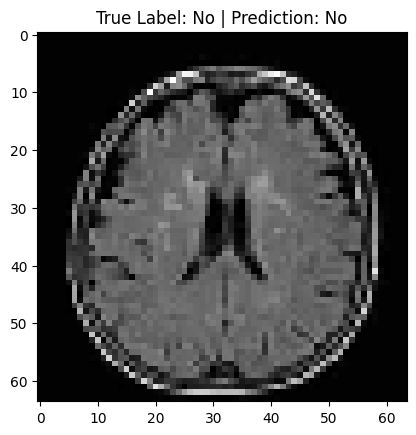

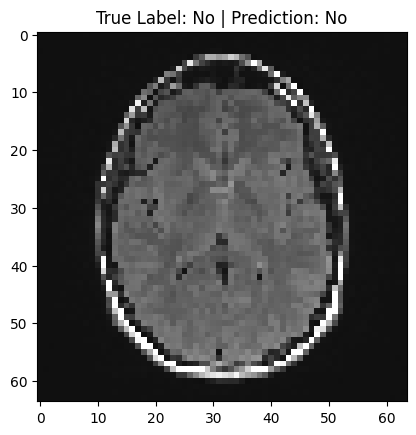

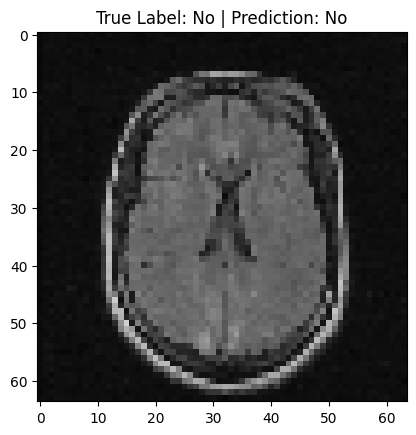

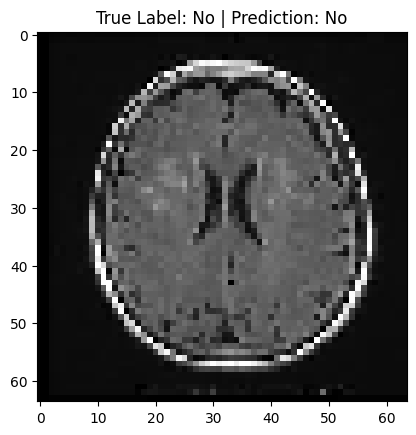

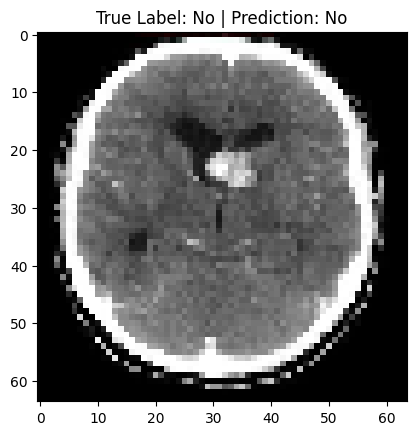

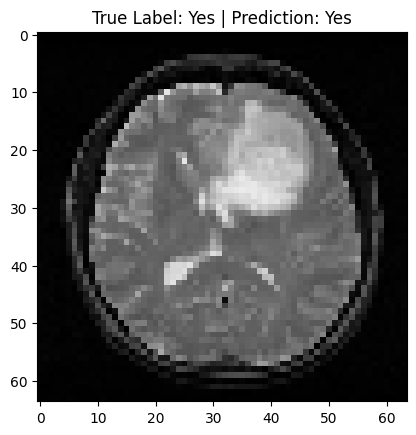

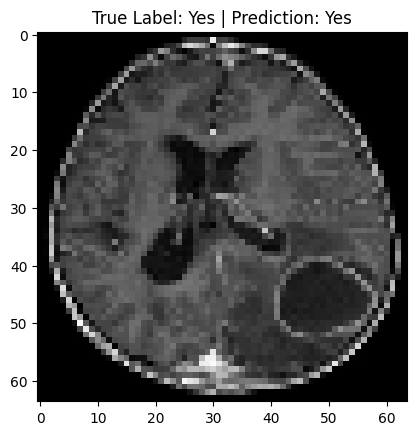

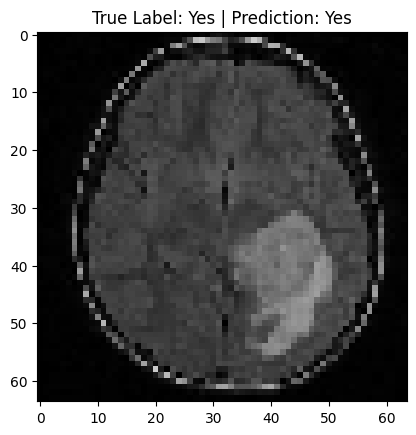

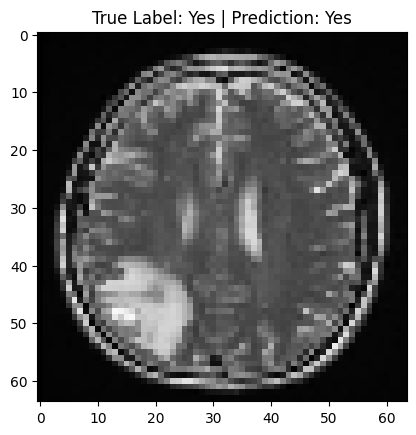

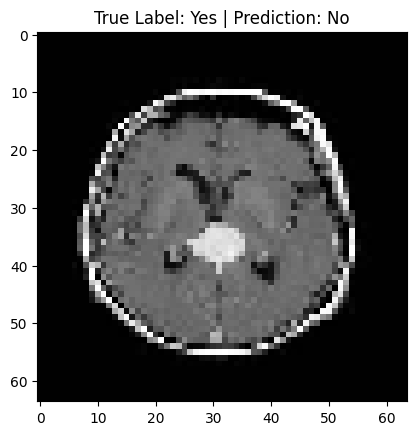

              precision    recall  f1-score   support

          No       0.76      0.97      0.85        98
         Yes       0.98      0.81      0.88       155

    accuracy                           0.87       253
   macro avg       0.87      0.89      0.87       253
weighted avg       0.89      0.87      0.87       253



In [ ]:
import random
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to predict an image without visualization
def predict_image(model, file_path):
    img = image.load_img(file_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    result = model.predict(img_array, verbose=0)

    return 'Yes' if result[0][0] == 1 else 'No'

# Function to visualize predictions for a subset of images with true labels
def visualize_predictions_with_labels(model, no_dir, yes_dir):
    no_files = random.sample(os.listdir(no_dir), 5)
    yes_files = random.sample(os.listdir(yes_dir), 5)

    for file_name in no_files:
        file_path = os.path.join(no_dir, file_name)
        prediction = predict_image(model, file_path)

        img = image.load_img(file_path, target_size=(64, 64))
        plt.imshow(img)
        plt.title(f'True Label: No | Prediction: {prediction}')
        plt.show()

    for file_name in yes_files:
        file_path = os.path.join(yes_dir, file_name)
        prediction = predict_image(model, file_path)

        img = image.load_img(file_path, target_size=(64, 64))
        plt.imshow(img)
        plt.title(f'True Label: Yes | Prediction: {prediction}')
        plt.show()

# Function to generate classification report using all files
def generate_full_classification_report(model, no_dir, yes_dir):
    predictions = []
    true_labels = []

    for class_label, directory in [('No', no_dir), ('Yes', yes_dir)]:
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            prediction = predict_image(model, file_path)
            predictions.append(prediction)
            true_labels.append(class_label)

    print(classification_report(true_labels, predictions))

# Example usage:
no_dir = '/content/drive/MyDrive/Csv  files/brain_tumor_dataset/no'
yes_dir = '/content/drive/MyDrive/Csv  files/brain_tumor_dataset/yes'

# Visualize predictions for 10 random images (5 from each folder) with true labels
visualize_predictions_with_labels(cnn, no_dir, yes_dir)

# Generate classification report using all files from both folders
generate_full_classification_report(cnn, no_dir, yes_dir)
